In [88]:
# This analysis is comparing trends of vaccine rates and case rate of COVID-19 in NYC 
# using Citywide Immunization Registry data (CIR) and
# NYC Department of Health and Mental Hygiene dataset on COVID-19 case rate

import pandas as pd
import scipy
from numpy import mean
from numpy import std
from matplotlib import pyplot
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# read CIR data on vaccines administered
df= pd.read_csv('https://raw.githubusercontent.com/nychealth/covid-vaccine-data/main/doses/doses-by-day.csv', sep=',',na_values='')

# get column names in dataset
df.info()

# checking how many days are in dataset
print(len(df['DATE']))

# convert date column data type
df["DATE"] = pd.to_datetime(df.DATE)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DATE                                  739 non-null    object 
 1   ADMIN_DOSE1_DAILY                     739 non-null    int64  
 2   ADMIN_DOSE1_CUMULATIVE                739 non-null    int64  
 3   ADMIN_DOSE2_DAILY                     739 non-null    int64  
 4   ADMIN_DOSE2_CUMULATIVE                739 non-null    int64  
 5   ADMIN_SINGLE_DAILY                    739 non-null    int64  
 6   ADMIN_SINGLE_CUMULATIVE               739 non-null    int64  
 7   ADMIN_ADDITIONAL1_DAILY               739 non-null    int64  
 8   ADMIN_ADDITIONAL1_CUMULATIVE          739 non-null    int64  
 9   ADMIN_ADDITIONAL2_DAILY               739 non-null    int64  
 10  ADMIN_ADDITIONAL2_CUMULATIVE          739 non-null    int64  
 11  ADMIN_ADDITIONAL_DA

In [63]:
# making sure the rows within the vaccine dataset match the case rate dataset
start_date = '2020-12-14'
end_date = '2022-12-22'
mask = (df['DATE'] >= start_date) & (df['DATE'] <= end_date)
df_vaccine = df.loc[mask]
display(len(df_vaccine))



739

In [64]:
# read second dataset on case rate
df2 = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/cases-by-day.csv', sep=',',na_values='')

# getting column names in dataset
df2.info()


# checking how many days in dataset
print(len(df2['date_of_interest']))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date_of_interest            1033 non-null   object
 1   CASE_COUNT                  1033 non-null   int64 
 2   PROBABLE_CASE_COUNT         1033 non-null   int64 
 3   CASE_COUNT_7DAY_AVG         1033 non-null   int64 
 4   ALL_CASE_COUNT_7DAY_AVG     1033 non-null   int64 
 5   BX_CASE_COUNT               1033 non-null   int64 
 6   BX_PROBABLE_CASE_COUNT      1033 non-null   int64 
 7   BX_CASE_COUNT_7DAY_AVG      1033 non-null   int64 
 8   BX_ALL_CASE_COUNT_7DAY_AVG  1033 non-null   int64 
 9   BK_CASE_COUNT               1033 non-null   int64 
 10  BK_PROBABLE_CASE_COUNT      1033 non-null   int64 
 11  BK_CASE_COUNT_7DAY_AVG      1033 non-null   int64 
 12  BK_ALL_CASE_COUNT_7DAY_AVG  1033 non-null   int64 
 13  MN_CASE_COUNT               1033 non-null   int6

In [65]:
# use pandas.to_datetime() to change datetime format/type
df2['DATE'] = pd.to_datetime(df2.date_of_interest)
print(df2)

start_date_case = '2020-12-14'
end_date_case = '2022-12-22'
mask = (df2['DATE'] >= start_date_case) & (df2['DATE'] <= end_date_case)
df2_case = df2.loc[mask]
display(len(df2_case))






     date_of_interest  CASE_COUNT  PROBABLE_CASE_COUNT  CASE_COUNT_7DAY_AVG  \
0          02/29/2020           1                    0                    0   
1          03/01/2020           0                    0                    0   
2          03/02/2020           0                    0                    0   
3          03/03/2020           1                    0                    0   
4          03/04/2020           5                    0                    0   
...               ...         ...                  ...                  ...   
1028       12/23/2022        2311                  801                 2781   
1029       12/24/2022         996                  426                 2636   
1030       12/25/2022         816                  326                 2489   
1031       12/26/2022        2191                 1002                 2248   
1032       12/27/2022        3073                 1043                 2202   

      ALL_CASE_COUNT_7DAY_AVG  BX_CASE_COUNT  BX_PR

739

In [66]:
# select data on cumulative total of vaccines admimistered per day
vaccine_total=df_vaccine['ADMIN_ALLDOSES_DAILY']
print(vaccine_total.sum())
case_total=df2_case['CASE_COUNT']
print(case_total.sum())
vaccine_dose1=df_vaccine['ADMIN_DOSE1_DAILY']
vaccine_dose2=df_vaccine['ADMIN_DOSE2_DAILY']



19459017
2272628


In [68]:
# merging dataframes
merged_data= pd.merge(df2_case, df_vaccine, how='outer',on ='DATE')
merged_data.head(10)

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_ALL_CASE_COUNT_7DAY_AVG,BK_CASE_COUNT,...,ADMIN_ADDITIONAL2_CUMULATIVE,ADMIN_ADDITIONAL_DAILY,ADMIN_ADDITIONAL_CUMULATIVE,ADMIN_BIVALENT_ADDITIONAL_DAILY,ADMIN_BIVALENT_ADDITIONAL_CUMULATIVE,ADMIN_ALLDOSES_DAILY,ADMIN_ALLDOSES_7DAYAVG,ADMIN_ALLDOSES_CUMULATIVE,ADMIN_ALLDOSES_PRIMARY,INCOMPLETE_y
0,12/14/2020,3581,1078,2894,3783,614,182,488,641,1111,...,0,0,0,0,0,81,NaN,81,81,0
1,12/15/2020,3681,944,2983,3877,634,187,507,663,1065,...,0,0,0,0,0,2064,NaN,2145,2145,0
2,12/16/2020,2788,777,2937,3806,445,129,495,644,842,...,0,1,1,0,0,4626,NaN,6771,6770,0
3,12/17/2020,1926,770,2763,3612,266,135,452,598,649,...,0,1,2,0,0,4681,NaN,11452,11450,0
4,12/18/2020,3427,836,2827,3667,619,156,469,618,1024,...,0,2,4,0,0,5857,NaN,17309,17305,0
5,12/19/2020,2557,690,2877,3733,405,123,471,622,764,...,0,0,4,0,0,1698,NaN,19007,19003,0
6,12/20/2020,2346,710,2901,3730,292,121,468,615,768,...,0,0,4,0,0,1120,2875.29,20127,20123,0
7,12/21/2020,4338,1044,3009,3833,717,173,483,629,1307,...,0,5,9,0,0,6417,3780.43,26544,26535,0
8,12/22/2020,4103,948,3069,3894,732,202,497,645,1251,...,0,1,10,0,0,9798,4885.29,36342,36332,0
9,12/23/2020,3844,937,3220,4068,635,174,524,679,1100,...,0,0,10,0,0,14317,6269.71,50659,50649,0


0.06219274332407127
0.7778451020818044


Text(0, 0.5, 'Rate')

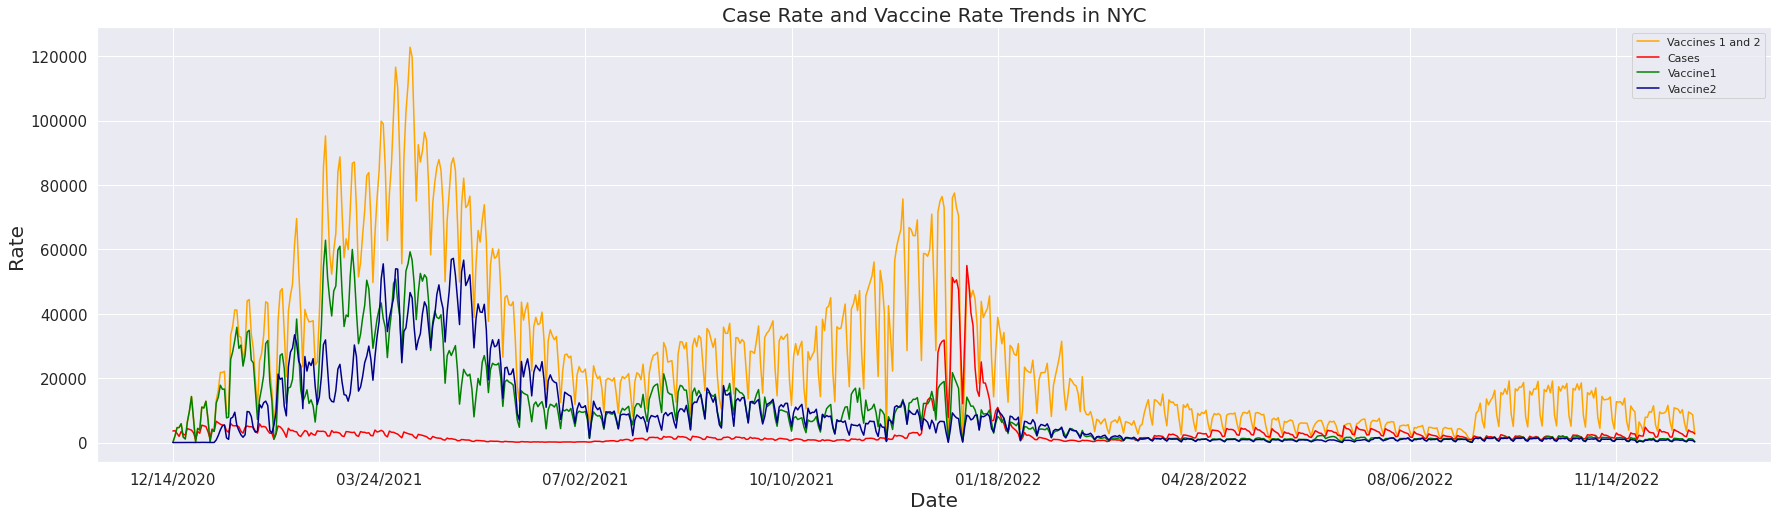

In [87]:
# find correlation values between data
print(vaccine_total.corr(case_total))
print(vaccine_dose1.corr(vaccine_dose2))


ax=merged_data.plot(x='date_of_interest', y='ADMIN_ALLDOSES_DAILY',fontsize=15, label = "Vaccines 1 and 2", linestyle="-",color='orange')
merged_data.plot(ax=ax, y='CASE_COUNT', color='red', label='Cases',figsize=(30, 8))
merged_data.plot(ax=ax, y='ADMIN_DOSE1_DAILY', color='green', label='Vaccine1')
merged_data.plot(ax=ax, y='ADMIN_DOSE2_DAILY', color='darkblue', label='Vaccine2')
plt.title("Case Rate and Vaccine Rate Trends in NYC", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Rate', fontsize=20)





